<a href="https://colab.research.google.com/github/DmitriiPushkarev/PythonHomework/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №2


Перед вами датасет с данными о вреде курения


Структура данных:

1. **gender**: Пол пациента
2. **age**: Возраст пациента
3. **hypertension**: Наличие гипертонии у пациента 1 - есть, 0 - не наблюдалось
4. **heart_disease**: Наличие у пациента болезней связанных с сердцем 1 - есть, 0 - здоров
5. **ever_married**: Брак - (Состоял в браке/ холост)
6. **work_type**: Работ - Ребенок(children), Госслужащий(Govt_jov), Никогда не работал(Never_worked), Самозанятый(self-employed) или Скрыто(private)
7. **Residence_type**: место работы городская среда(Urban)/удаленка или за городом(Rural)
8. **avg_glucose_level**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **smoking_status**: Пациент курит(Иногда, всегда, время от времени или Unknown - неизвестно)
11. **stroke**: Перенесенный инсульт (1 - пациент перенес инсульт, 0 - инсульта не было) - *ваш target*

## Ваша задача

№1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series. 

1.  Заполнить пропуски
2.  Убрать дубликаты
3.  Убрать некорректные данные и.т.п.


№2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

№3 Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'])
data = data.drop('index',axis=1)

In [ ]:
data = data.iloc[2: , :]

In [ ]:
data['age'] = pd.to_numeric(data['age'])
data['age'] = data['age'].fillna(data['age'].mean())

In [ ]:
data['hypertension'] = pd.to_numeric(data['hypertension'])
data['hypertension'] = data['hypertension'].fillna(data['hypertension'].mean())

In [ ]:
data['heart_disease'] = pd.to_numeric(data['heart_disease'])
data['heart_disease'] = data['heart_disease'].fillna(data['heart_disease'].mean())

In [ ]:
data['bmi'] = pd.to_numeric(data['bmi'])
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [ ]:
data['stroke'] = pd.to_numeric(data['stroke'])
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())

In [ ]:
data['Residence_type'] = data['Residence_type'].fillna('Urban')

In [ ]:
data['Residence_type'] = data['Residence_type'].fillna('Private')

In [ ]:
data.size

56210

In [ ]:
data.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,28.935709,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,28.935709,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,Urban,105.92,32.500000,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.400000,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5107,Female,80.0,1.0,0.0,Yes,Private,Urban,83.75,28.935709,never smoked,0
5108,Female,81.0,0.0,0.0,Yes,Self-employed,Urban,125.2,40.000000,never smoked,0
5109,Female,35.0,0.0,0.0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5110,Male,51.0,0.0,0.0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
data.size

56210

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df = data
encoder = OrdinalEncoder()
df[['work_type', "smoking_status"]] = pd.DataFrame(encoder.fit_transform(df[['work_type', "smoking_status"]]), columns=df[['work_type', "smoking_status"]].columns)
df.ever_married = df.ever_married.apply(lambda x: 1 if x == "Yes" else 0)
df.gender = df.gender.apply(lambda x: 1 if x == "Male" else 0)
df.age = df.age.apply(lambda x: float(x))
df.hypertension = df.hypertension.apply(lambda x: int(float(x)))
df.heart_disease = df.heart_disease.apply(lambda x: int(float(x)))
df.Residence_type = df.Residence_type.apply(lambda x: 1 if x == "Urban" else 0)
df.avg_glucose_level	 = df.avg_glucose_level	.apply(lambda x: float(x))
df.bmi	 = df.bmi.apply(lambda x: float(x))
df.stroke	 = df.stroke.apply(lambda x: int(float(x)))
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 2 to 5099
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4311 non-null   int64  
 1   age                4311 non-null   float64
 2   hypertension       4311 non-null   int64  
 3   heart_disease      4311 non-null   int64  
 4   ever_married       4311 non-null   int64  
 5   work_type          4311 non-null   float64
 6   Residence_type     4311 non-null   int64  
 7   avg_glucose_level  4311 non-null   float64
 8   bmi                4311 non-null   float64
 9   smoking_status     4311 non-null   float64
 10  stroke             4311 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 404.2 KB


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,0,67.000000,0,1,0,2.0,0,228.69,28.935709,3.0,1
3,0,61.000000,0,0,0,2.0,0,202.21,28.935709,0.0,1
4,0,80.000000,0,1,0,2.0,0,105.92,32.500000,2.0,1
5,0,49.000000,0,0,0,3.0,0,171.23,34.400000,2.0,1
7,0,81.000000,0,0,0,2.0,0,186.21,29.000000,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5095,0,45.000000,1,0,0,2.0,0,95.02,28.935709,2.0,0
5096,0,13.000000,0,0,0,3.0,0,82.38,24.300000,2.0,0
5097,0,1.080000,0,0,0,3.0,0,79.15,17.400000,2.0,0
5098,0,43.233002,0,0,0,2.0,0,76.62,28.200000,1.0,0


In [96]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level','bmi','smoking_status']]
y = df['stroke']

In [97]:
params = {"n_estimators": [50, 75, 100], "criterion": ["gini"], 
              "max_depth": [2, 3, 4], "min_samples_split": [2, 3, 4]}
random_classifier = RandomForestClassifier(random_state=5)
grid_forest = GridSearchCV(random_classifier, params, error_score='raise')
grid_forest.fit(X, y)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 75, 100]})

In [98]:
pred_grid = grid_forest.predict(X)
f1 = f1_score(y, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision = precision_score(y, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall = recall_score(y, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy = accuracy_score(y, pred_grid)
print('f1 = {}, precision = {}, recall = {}, accuracy = {}'.format(round(f1, 3), round(precision, 3), round(recall, 3), round(accuracy, 3)))

f1 = 0.975, precision = 0.952, recall = 1.0, accuracy = 0.952


##Визуализация

In [ ]:
sns.set_theme()
sorted = data[['stroke', 'age']].sort_values('age')

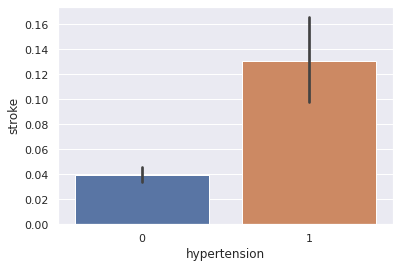

In [ ]:
sns.barplot(y = 'stroke', x = 'hypertension', data = df)

<BarContainer object of 4311 artists>

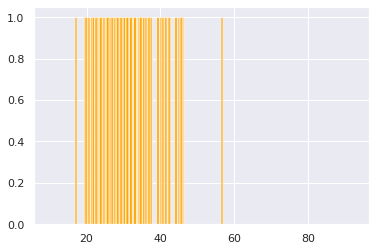

In [ ]:
plt.bar(df['bmi'], df['stroke'], color='orange', alpha=0.5)

<BarContainer object of 4311 artists>

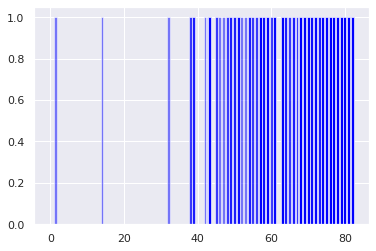

In [ ]:
plt.bar(df['age'], df['stroke'], color='blue', alpha=0.5)

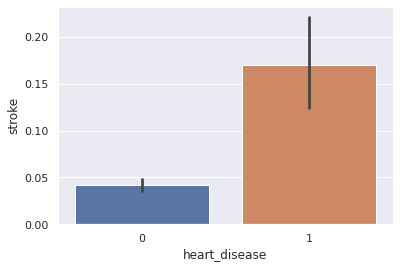

In [ ]:
sns.barplot(y = 'stroke', x = 'heart_disease', data = df)

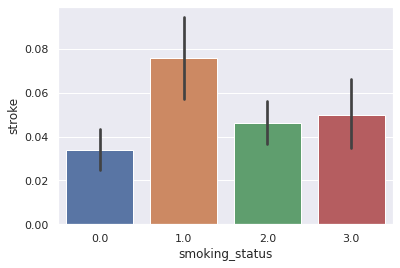

In [ ]:
sns.barplot(y = 'stroke', x = 'smoking_status', data = df)